LDA ile Konu modellemesi

In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv("e-ticaret_urun_yorumlari.csv", delimiter=';')
df.head(3)

,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1


In [11]:
#Sadece metin sütunun kullanılması, konu modelleme için yeterli olacaktır.
yorum_veriseti=df[["Metin"]]
yorum_veriseti.head(3)

,Metin
0,evet anlatıldığı gibi
1,Daha öncede almıştım bu cihazdan ense ve sakal...
2,Ürün gayet başarılı sakal kesmede başlık sayıs...


In [12]:
#veri temizleme işlemi için bir fonksiyon hazırlanması
import re 
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

nok_isaretleri= string.punctuation
etkisiz_kelimeler= stopwords.words('turkish')
etkisiz_kelimeler.extend (["bir", "kadar", "sonra"])

def veriTemizleme(metin):
    metin=metin.lower()
    metin=metin.replace("\\n"," ")
    #kesme işareti ve sonrasındaki karakterlerin aldırılması
    metin=re.sub("'(\w+)", "", metin)
    metin=re.sub("’(\w+)", "", metin)
    #sayıların kaldırılması
    metin=re.sub("[0-9]+", "", metin)
    #noktalama işaretlerinin kaldırılması
    metin="".join(list(map(lambda x:x if x not in nok_isaretleri else " " , metin)))
    #etkisiz kelimelerin bazılarının kaldırılması
    metin=" ".join([i for i in metin.split() if i not in etkisiz_kelimeler])
    #metinde tek kalan harflerin çıkarılması
    metin=" ".join([i for i in metin.split() if len(i) > 1])

    return metin
    



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gülseren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Temizlenmemiş veri seti
print("Temizlenmemiş Veri Seti:")
print(df["Metin"].head(10))

# Temizlenmiş veri seti
print("\nTemizlenmiş Veri Seti:")
temizlenen_metin = yorum_veriseti["Metin"].apply(veriTemizleme)
print(temizlenen_metin.head(10))


Temizlenmemiş Veri Seti:
0                                evet anlatıldığı gibi
1    Daha öncede almıştım bu cihazdan ense ve sakal...
2    Ürün gayet başarılı sakal kesmede başlık sayıs...
3    Daha öncede aynısını almıştım çok güzel ve kal...
4    Erkek kuaförüyüm ense ve sıfır sakal traşı içi...
5                             ürün gerçekten çok güzel
6    Ürün beklediğimden güzel çıktı gayet kullanışl...
7                          güzel makina tavsiye ederim
8            tavsiye edebileceğim çok güzel bir makina
9    ürün geldiğinde şarjı vardı. ilk lullanım önce...
Name: Metin, dtype: object

Temizlenmiş Veri Seti:


0                                     evet anlatıldığı
1    öncede almıştım cihazdan ense sakal tüketmek o...
2    ürün gayet başarılı sakal kesmede başlık sayıs...
3         öncede aynısını almıştım güzel kaliteli ürün
4    erkek kuaförüyüm ense sıfır sakal traşı uygun ...
5                                 ürün gerçekten güzel
6    ürün beklediğimden güzel çıktı gayet kullanışl...
7                          güzel makina tavsiye ederim
8                    tavsiye edebileceğim güzel makina
9    ürün geldiğinde şarjı vardı ilk lullanım önces...
Name: Metin, dtype: object


In [14]:
# Tokenize etme
yorum_veriseti["temizlenen_metin_token"] = temizlenen_metin.apply(lambda x: x.split())
yorum_veriseti.head(10)



,Metin,temizlenen_metin_token
0,evet anlatıldığı gibi,"[evet, anlatıldığı]"
1,Daha öncede almıştım bu cihazdan ense ve sakal...,"[öncede, almıştım, cihazdan, ense, sakal, tüke..."
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,"[ürün, gayet, başarılı, sakal, kesmede, başlık..."
3,Daha öncede aynısını almıştım çok güzel ve kal...,"[öncede, aynısını, almıştım, güzel, kaliteli, ..."
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,"[erkek, kuaförüyüm, ense, sıfır, sakal, traşı,..."
5,ürün gerçekten çok güzel,"[ürün, gerçekten, güzel]"
6,Ürün beklediğimden güzel çıktı gayet kullanışl...,"[ürün, beklediğimden, güzel, çıktı, gayet, kul..."
7,güzel makina tavsiye ederim,"[güzel, makina, tavsiye, ederim]"
8,tavsiye edebileceğim çok güzel bir makina,"[tavsiye, edebileceğim, güzel, makina]"
9,ürün geldiğinde şarjı vardı. ilk lullanım önce...,"[ürün, geldiğinde, şarjı, vardı, ilk, lullanım..."


In [17]:
#LDA Model Eğitimi
import gensim
import pyLDAvis.gensim 

# Kelime listesi - Dict oluşturulması
tokenlasmis_metinler = yorum_veriseti["temizlenen_metin_token"]

# Kelime listesi Filtreleme
kelime_listesi = gensim.corpora.Dictionary(tokenlasmis_metinler)

# Terimlerin Vektörletirilmesi (Doküman-Terim matrisinin oluşturulması)
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in tokenlasmis_metinler]


In [22]:
# LDA Model Eğitimi
lda_model_genis = gensim.models.ldamodel.LdaModel(corpus=dokuman_terim_matrisi,
                                                  id2word=kelime_listesi,
                                                  num_topics=30,  # Daha geniş bir konu sayısı
                                                  passes=10)

# Oluşturulan soyut konular içinde en fazla bulunan terimler
konular_genis = lda_model_genis.print_topics(num_words=7)
for konu in konular_genis:
    print(konu)
def konu_etiketle(yorum_metni):
    temizlenmis_metin = veriTemizleme(yorum_metni)
    tokenlasmis_metin = temizlenmis_metin.split()
    dokuman_terim = kelime_listesi.doc2bow(tokenlasmis_metin)
    konu_prob = lda_model_genis[dokuman_terim]
    en_uygun_konu = max(konu_prob, key=lambda item: item[1])[0]
    return en_uygun_konu

# Her yorumun konusunu etiketleme
yorum_veriseti["Yorum_Konu"] = yorum_veriseti["Metin"].apply(konu_etiketle)
print(yorum_veriseti[["Metin", "Yorum_Konu"]])


KeyboardInterrupt: 

In [20]:
#LDA MODEL
lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                            id2word = kelime_listesi,
                                            num_topics = 30,
                                            passes = 10)

KeyboardInterrupt: 

In [21]:
# Her yorumun en uygun konusuyla ilişkilendirildiği bir dizi oluşturma
yorum_konulari = []
for i in range(len(dokuman_terim_matrisi)):
    konu_prob = lda_model[dokuman_terim_matrisi[i]]
    en_uygun_konu = max(konu_prob, key=lambda item: item[1])[0]
    yorum_konulari.append(en_uygun_konu)

# Oluşturulan diziye uygun bir sütun ekleme
yorum_veriseti["Yorum_Konu"] = yorum_konulari

# Her yorumun konu sütunuyla birlikte görüntülenmesi
print(yorum_veriseti[["Metin", "Yorum_Konu"]])

NameError: name 'lda_model' is not defined

In [ ]:
# Tutarlılık (Coherence) skoru ile en iyi konu sayısı seçimi
from gensim.models import CoherenceModel

tutarlilik_skorlar_listesi = []
konu_sayisi_listesi = []
konu_sayisi_aralik_listesi = [5, 10, 15, 20, 25]

for konu_sayisi in konu_sayisi_aralik_listesi:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=dokuman_terim_matrisi,
                                                id2word=kelime_listesi,
                                                num_topics=konu_sayisi,
                                                passes=10)

    tutarlilik_model_lda = CoherenceModel(model=lda_model, texts=tokenlasmis_metinler,
                                          dictionary=kelime_listesi, coherence='c_v')

    gecici_tutarlilik_skoru_lda = tutarlilik_model_lda.get_coherence()
    tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
    konu_sayisi_listesi.append(konu_sayisi)


[5, 10, 15, 20, 25]
[0.4165886872483832, 0.3480314844032721, 0.40164984164528345, 0.4017479725122136, 0.38212541946010325]


<function matplotlib.pyplot.show(close=None, block=None)>

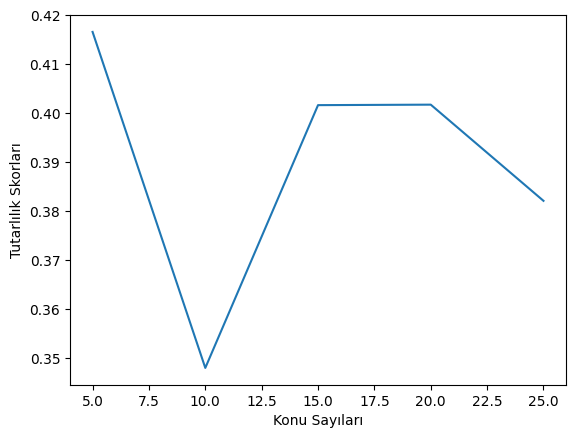

In [ ]:
#Tutarlılık skoru görselleştirme
import matplotlib.pyplot as plt

plt.plot(konu_sayisi_listesi, tutarlilik_skorlar_listesi,"-")
print(konu_sayisi_listesi)
print(tutarlilik_skorlar_listesi)
plt.xlabel("Konu Sayıları")
plt.ylabel("Tutarlılık Skorları")

plt.show

In [ ]:
#Oluşturulan soyut konular içinde en fazla bulunan terimler

konular = lda_model.print_topics(num_words=7)
konular = sorted(konular, key= lambda x : x[0])
for konu in konular:
    print(konu)

(0, '0.120*"değil" + 0.092*"kaliteli" + 0.055*"ürün" + 0.046*"uygun" + 0.032*"çalışmıyor" + 0.030*"fiyatı" + 0.027*"uzun"')
(1, '0.159*"tavsiye" + 0.097*"etmiyorum" + 0.075*"kesinlikle" + 0.062*"etmem" + 0.057*"para" + 0.047*"eder" + 0.047*"basit"')
(2, '0.165*"kalitesi" + 0.067*"kötü" + 0.044*"sesi" + 0.044*"sürekli" + 0.037*"görüntü" + 0.032*"alın" + 0.032*"beş"')
(3, '0.090*"bozuldu" + 0.052*"resmen" + 0.040*"böyle" + 0.032*"tl" + 0.018*"derim" + 0.018*"ye" + 0.016*"kesiyor"')
(4, '0.109*"beğenmedim" + 0.076*"siyah" + 0.050*"değil" + 0.044*"rahat" + 0.041*"sert" + 0.030*"normal" + 0.028*"başladı"')
(5, '0.131*"berbat" + 0.066*"ürün" + 0.064*"harika" + 0.061*"ediyorum" + 0.041*"oğlum" + 0.039*"süper" + 0.032*"hayal"')
(6, '0.115*"iade" + 0.082*"geldi" + 0.063*"ürün" + 0.040*"ettim" + 0.030*"geri" + 0.029*"sipariş" + 0.027*"ürünün"')
(8, '0.150*"aldım" + 0.076*"olarak" + 0.061*"almıştım" + 0.047*"hediye" + 0.045*"ben" + 0.034*"almayin" + 0.028*"çantası"')
(9, '0.061*"kırık" + 0.039*"s

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Örnek veri seti ve etiketleri
X = df['Metin']
y = df['Durum']  # 'Etiket' sütunu, sınıfları içermelidir.

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi sayısal formata dönüştürme
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes sınıflandırma modelini eğitme
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_vec)

# Sınıflandırma raporu ve doğruluk değeri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1370
           1       0.87      0.96      0.91      1384
           2       0.61      0.24      0.34       280

    accuracy                           0.88      3034
   macro avg       0.80      0.71      0.73      3034
weighted avg       0.87      0.88      0.86      3034

Doğruluk (Accuracy): 0.8800263678312459


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Örnek veri seti ve etiketleri
X = df['Metin']
y = df['Durum']  # 'Etiket' sütunu, sınıfları içermelidir.

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi sayısal formata dönüştürme
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# LogisticRegression sınıflandırma modelini eğitme
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_vec)

# Sınıflandırma raporu ve doğruluk değeri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1370
           1       0.91      0.95      0.93      1384
           2       0.60      0.51      0.55       280

    accuracy                           0.89      3034
   macro avg       0.81      0.79      0.80      3034
weighted avg       0.89      0.89      0.89      3034

Doğruluk (Accuracy): 0.8915622940013184


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirici ve SVM sınıflandırıcıyı içeren bir pipeline oluşturun
model = make_pipeline(TfidfVectorizer(), SVC(C=1.0, kernel='linear', gamma='auto'))

# Modeli eğitin
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1370
           1       0.92      0.94      0.93      1384
           2       0.61      0.50      0.55       280

    accuracy                           0.89      3034
   macro avg       0.81      0.79      0.80      3034
weighted avg       0.89      0.89      0.89      3034

Doğruluk (Accuracy): 0.8932102834541858


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirici ve LinearSVC sınıflandırıcıyı içeren bir pipeline oluşturun
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# Grid Search için parametreler
param_grid = {
    'tfidf__max_features': [1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
}

# Grid Search ve Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri göster
print("En İyi Parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak test seti üzerinde tahmin yapın
y_pred = grid_search.predict(X_test)

# Model performansını değerlendirin
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


En İyi Parametreler: {'clf__C': 1, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1370
           1       0.92      0.95      0.94      1384
           2       0.65      0.49      0.56       280

    accuracy                           0.91      3034
   macro avg       0.83      0.80      0.81      3034
weighted avg       0.90      0.91      0.90      3034

Doğruluk (Accuracy): 0.9060646011865524
